# Matplotlib Basic Plots

In [1]:
import numpy as np  
import pandas as pd
df = pd.read_excel('https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DV0101EN/labs/Data_Files/Canada.xlsx',
                       sheet_name='Canada by Citizenship',
                       skiprows=range(20),
                       skipfooter=2)
df.head()

,Type,Coverage,OdName,AREA,AreaName,REG,RegName,DEV,DevName,1980,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
0,Immigrants,Foreigners,Afghanistan,935,Asia,5501,Southern Asia,902,Developing regions,16,...,2978,3436,3009,2652,2111,1746,1758,2203,2635,2004
1,Immigrants,Foreigners,Albania,908,Europe,925,Southern Europe,901,Developed regions,1,...,1450,1223,856,702,560,716,561,539,620,603
2,Immigrants,Foreigners,Algeria,903,Africa,912,Northern Africa,902,Developing regions,80,...,3616,3626,4807,3623,4005,5393,4752,4325,3774,4331
3,Immigrants,Foreigners,American Samoa,909,Oceania,957,Polynesia,902,Developing regions,0,...,0,0,1,0,0,0,0,0,0,0
4,Immigrants,Foreigners,Andorra,908,Europe,925,Southern Europe,901,Developed regions,0,...,0,0,1,1,0,0,0,0,1,1


In [2]:
df.columns

Index([    'Type', 'Coverage',   'OdName',     'AREA', 'AreaName',      'REG',
        'RegName',      'DEV',  'DevName',       1980,       1981,       1982,
             1983,       1984,       1985,       1986,       1987,       1988,
             1989,       1990,       1991,       1992,       1993,       1994,
             1995,       1996,       1997,       1998,       1999,       2000,
             2001,       2002,       2003,       2004,       2005,       2006,
             2007,       2008,       2009,       2010,       2011,       2012,
             2013],
      dtype='object')

In [3]:
df.drop(['AREA','REG','DEV','Type','Coverage'], axis=1, inplace=True)
df.head()

,OdName,AreaName,RegName,DevName,1980,1981,1982,1983,1984,1985,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
0,Afghanistan,Asia,Southern Asia,Developing regions,16,39,39,47,71,340,...,2978,3436,3009,2652,2111,1746,1758,2203,2635,2004
1,Albania,Europe,Southern Europe,Developed regions,1,0,0,0,0,0,...,1450,1223,856,702,560,716,561,539,620,603
2,Algeria,Africa,Northern Africa,Developing regions,80,67,71,69,63,44,...,3616,3626,4807,3623,4005,5393,4752,4325,3774,4331
3,American Samoa,Oceania,Polynesia,Developing regions,0,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4,Andorra,Europe,Southern Europe,Developed regions,0,0,0,0,0,0,...,0,0,1,1,0,0,0,0,1,1


In [4]:
df.rename(
    columns={
        'OdName': 'Country',
        'AreaName': 'Continent',
        'RegName': 'Region'
    }, inplace=True)
df.columns

Index([  'Country', 'Continent',    'Region',   'DevName',        1980,
              1981,        1982,        1983,        1984,        1985,
              1986,        1987,        1988,        1989,        1990,
              1991,        1992,        1993,        1994,        1995,
              1996,        1997,        1998,        1999,        2000,
              2001,        2002,        2003,        2004,        2005,
              2006,        2007,        2008,        2009,        2010,
              2011,        2012,        2013],
      dtype='object')

Adding a ‘Total’ column which will show the total immigrants that came into Canada from 1980 to 2013 from each country:

In [5]:
df['Total'] = df.sum(axis=1)

In [6]:
df.isnull().sum()

Country      0
Continent    0
Region       0
DevName      0
1980         0
1981         0
1982         0
1983         0
1984         0
1985         0
1986         0
1987         0
1988         0
1989         0
1990         0
1991         0
1992         0
1993         0
1994         0
1995         0
1996         0
1997         0
1998         0
1999         0
2000         0
2001         0
2002         0
2003         0
2004         0
2005         0
2006         0
2007         0
2008         0
2009         0
2010         0
2011         0
2012         0
2013         0
Total        0
dtype: int64

In [7]:
df = df.set_index('Country')

Let's do the plotting part now:

In [8]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib as mpl

Choose a style for the plot. Available styles are as follows:

In [9]:
plt.style.available

['Solarize_Light2',
 '_classic_test_patch',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn',
 'seaborn-bright',
 'seaborn-colorblind',
 'seaborn-dark',
 'seaborn-dark-palette',
 'seaborn-darkgrid',
 'seaborn-deep',
 'seaborn-muted',
 'seaborn-notebook',
 'seaborn-paper',
 'seaborn-pastel',
 'seaborn-poster',
 'seaborn-talk',
 'seaborn-ticks',
 'seaborn-white',
 'seaborn-whitegrid',
 'tableau-colorblind10']

In [10]:
# Selecting 'ggplot' style
mpl.style.use(['ggplot'])

### Line Plot

In [11]:
years = list(map(int, range(1980, 2014)))

In [12]:
# Picking Switzerland as an example
df.loc['Switzerland', years]

1980    806
1981    811
1982    634
1983    370
1984    326
1985    314
1986    294
1987    565
1988    508
1989    523
1990    505
1991    602
1992    666
1993    728
1994    475
1995    687
1996    823
1997    666
1998    510
1999    536
2000    471
2001    383
2002    276
2003    346
2004    337
2005    270
2006    258
2007    308
2008    357
2009    328
2010    285
2011    266
2012    243
2013    201
Name: Switzerland, dtype: object

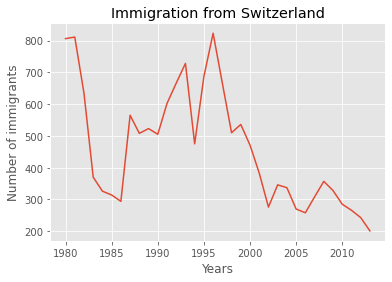

In [13]:
df.loc['Switzerland', years].plot()
plt.title('Immigration from Switzerland')
plt.ylabel('Number of immigrants')
plt.xlabel('Years')
plt.show()

Comparing 3 different countries

In [14]:
ind_pak_ban = df.loc[['India', 'Pakistan', 'Bangladesh'], years]
ind_pak_ban.head()

,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
Country,,,,,,,,,,,,,,,,,,,,,
India,8880,8670,8147,7338,5704,4211,7150,10189,11522,10343,...,28235,36210,33848,28742,28261,29456,34235,27509,30933,33087
Pakistan,978,972,1201,900,668,514,691,1072,1334,2261,...,13399,14314,13127,10124,8994,7217,6811,7468,11227,12603
Bangladesh,83,84,86,81,98,92,486,503,476,387,...,2660,4171,4014,2897,2939,2104,4721,2694,2640,3789


In [15]:
ind_pak_ban.T

Country,India,Pakistan,Bangladesh
1980,8880,978,83
1981,8670,972,84
1982,8147,1201,86
1983,7338,900,81
1984,5704,668,98
1985,4211,514,92
1986,7150,691,486
1987,10189,1072,503
1988,11522,1334,476
1989,10343,2261,387


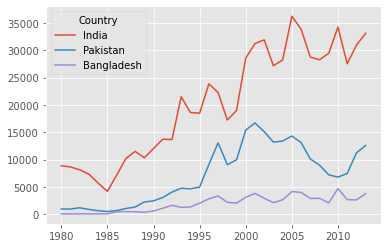

In [16]:
ind_pak_ban.T.plot();

### Pie Plot

To demonstrate the pie plot we will plot the total number of immigrants for each continent.

In [17]:
cont = df.groupby('Continent', axis=0).sum()
cont

,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
Continent,,,,,,,,,,,,,,,,,,,,,
Africa,3951,4363,3819,2671,2639,2650,3782,7494,7552,9894,...,27523,29188,28284,29890,34534,40892,35441,38083,38543,618948
Asia,31025,34314,30214,24696,27274,23850,28739,43203,47454,60256,...,159253,149054,133459,139894,141434,163845,146894,152218,155075,3317794
Europe,39760,44802,42720,24638,22287,20844,24370,46698,54726,60893,...,35955,33053,33495,34692,35078,33425,26778,29177,28691,1410947
Latin America and the Caribbean,13081,15215,16769,15427,13678,15171,21179,28471,21924,25060,...,24747,24676,26011,26547,26867,28818,27856,27173,24950,765148
Northern America,9378,10030,9074,7100,6661,6543,7074,7705,6469,6790,...,8394,9613,9463,10190,8995,8142,7677,7892,8503,241142
Oceania,1942,1839,1675,1018,878,920,904,1200,1181,1539,...,1585,1473,1693,1834,1860,1834,1548,1679,1775,55174


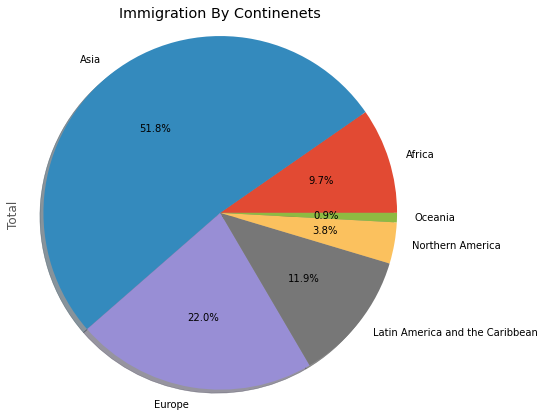

In [18]:
cont['Total'].plot(kind='pie', figsize=(7,7),
                   autopct='%1.1f%%', shadow=True)
plt.title('Immigration By Continenets')
plt.axis('equal')
plt.show()

This pie chart is understandable. But we can improve it with a little effort. This time I want to choose my own colors and a start angle.

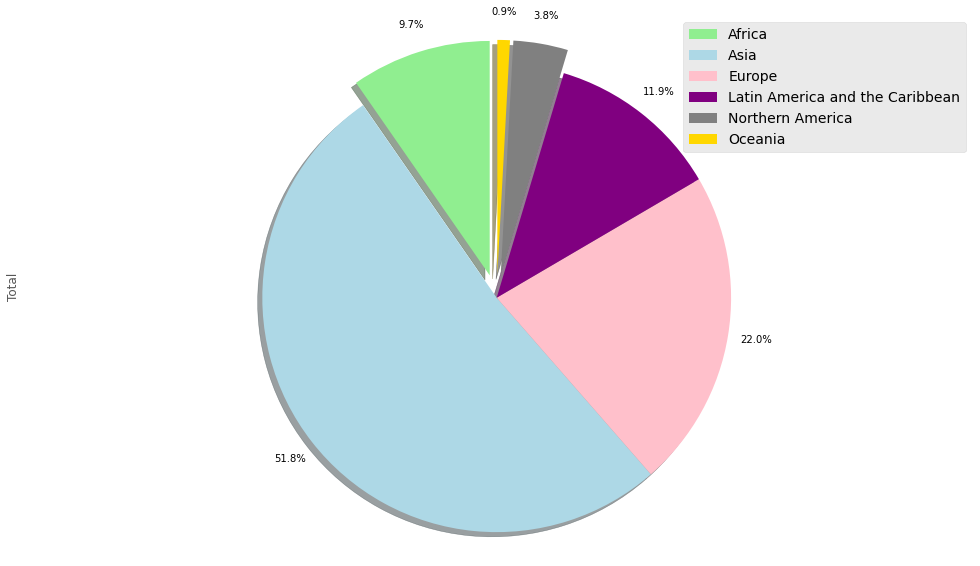

In [19]:
colors = ['lightgreen', 'lightblue', 'pink', 'purple', 'grey', 'gold']
explode = [0.1, 0, 0, 0, 0.1, 0.1]
cont['Total'].plot(kind='pie', figsize=(17,10),
                  autopct = '%1.1f%%', startangle=90,
                  shadow=True, labels=None,
                  pctdistance=1.12, colors=colors, explode=explode)
plt.axis('equal')
plt.legend(labels=cont.index, loc='upper right', fontsize=14)
plt.show()

### Box plot

We will make a box plot of the immigrant’s number of China first.

In [20]:
china = df.loc[["China"], years].T

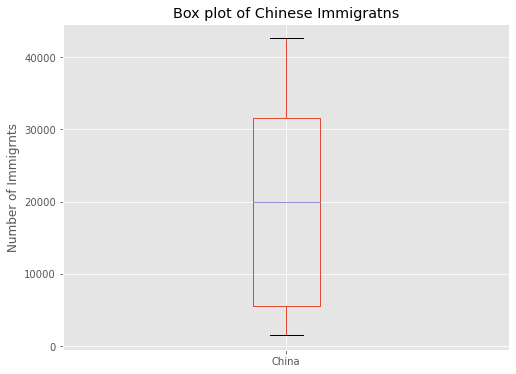

In [21]:
china.plot(kind='box', figsize=(8, 6))
plt.title('Box plot of Chinese Immigratns')
plt.ylabel('Number of Immigrnts')
plt.show()

Text(0, 0.5, 'Number of Immigrants')

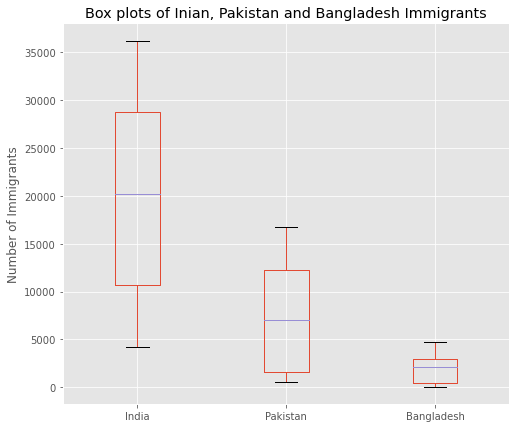

In [22]:
ind_pak_ban.T.plot(kind='box', figsize=(8, 7))
plt.title('Box plots of Inian, Pakistan and Bangladesh Immigrants')
plt.ylabel('Number of Immigrants')

### Scatter Plot

For this exercise, I will make a new DataFrame that will contain the years as an index and the total number of immigrants each year.

In [23]:
totalPerYear = pd.DataFrame(df[years].sum(axis=0))
totalPerYear.head()

,0
1980,99137
1981,110563
1982,104271
1983,75550
1984,73417


We need to convert the years to integers. I want to polish the DataFrame a bit just to make it presentable.

In [24]:
totalPerYear.index = map(int, totalPerYear.index)
totalPerYear.reset_index(inplace=True)
totalPerYear.rename(columns={
        'index': 'year',
        0: 'total'
    }, inplace=True)
totalPerYear.head()

,year,total
0,1980,99137
1,1981,110563
2,1982,104271
3,1983,75550
4,1984,73417


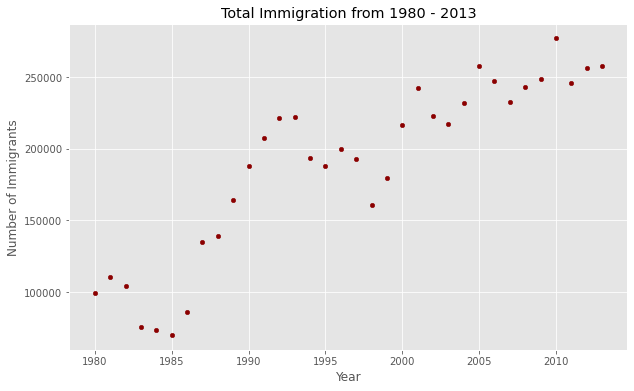

In [25]:
totalPerYear.plot(kind='scatter', x = 'year', y='total', figsize=(10, 6), color='darkred')
plt.title('Total Immigration from 1980 - 2013')
plt.xlabel('Year')
plt.ylabel('Number of Immigrants')
plt.show()

### Area Plot

The area plot shows the area covered under a line plot. For this plot, I want to make a DataFrame including the information of India, China, Pakistan, and France.

In [26]:
top = df.loc[['India', 'China', 'Pakistan', 'France'], years]
top = top.T
top.head()

Country,India,China,Pakistan,France
1980,8880,5123,978,1729
1981,8670,6682,972,2027
1982,8147,3308,1201,2219
1983,7338,1863,900,1490
1984,5704,1527,668,1169


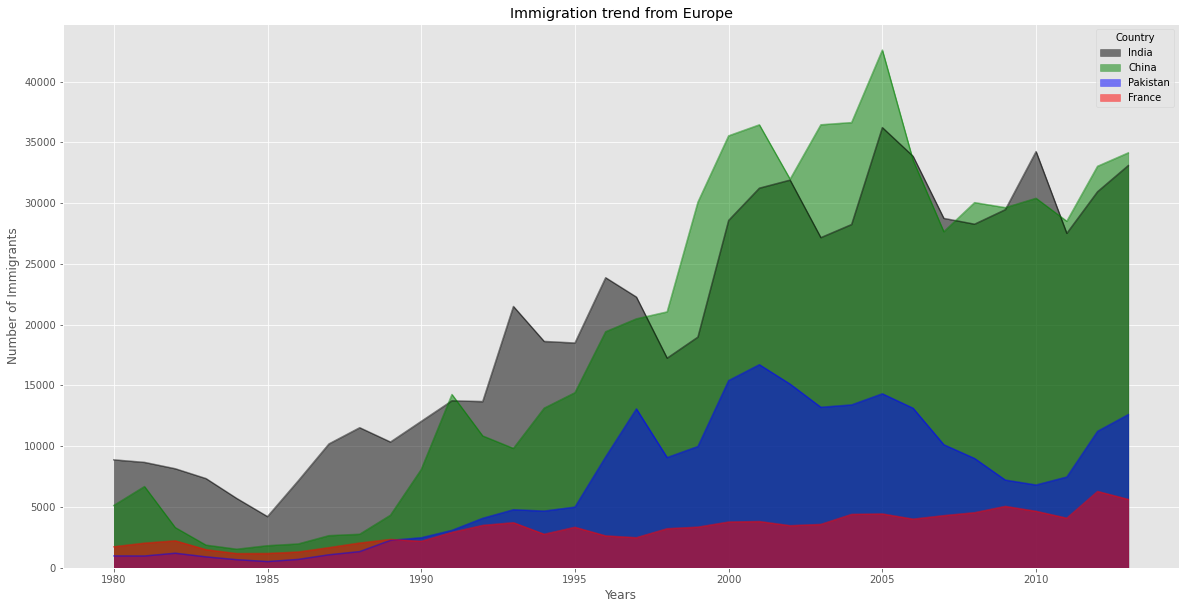

In [27]:
colors = ['black', 'green', 'blue', 'red']
top.plot(kind='area', stacked=False,
        figsize=(20, 10), color=colors)
plt.title('Immigration trend from Europe')
plt.ylabel('Number of Immigrants')
plt.xlabel('Years')
plt.show()

Remember to use this ‘stacked’ parameter above, if you want to see the individual countries area plot.
When it is unstacked, it does not show the individual variable’s area. It stacks on to the previous one.


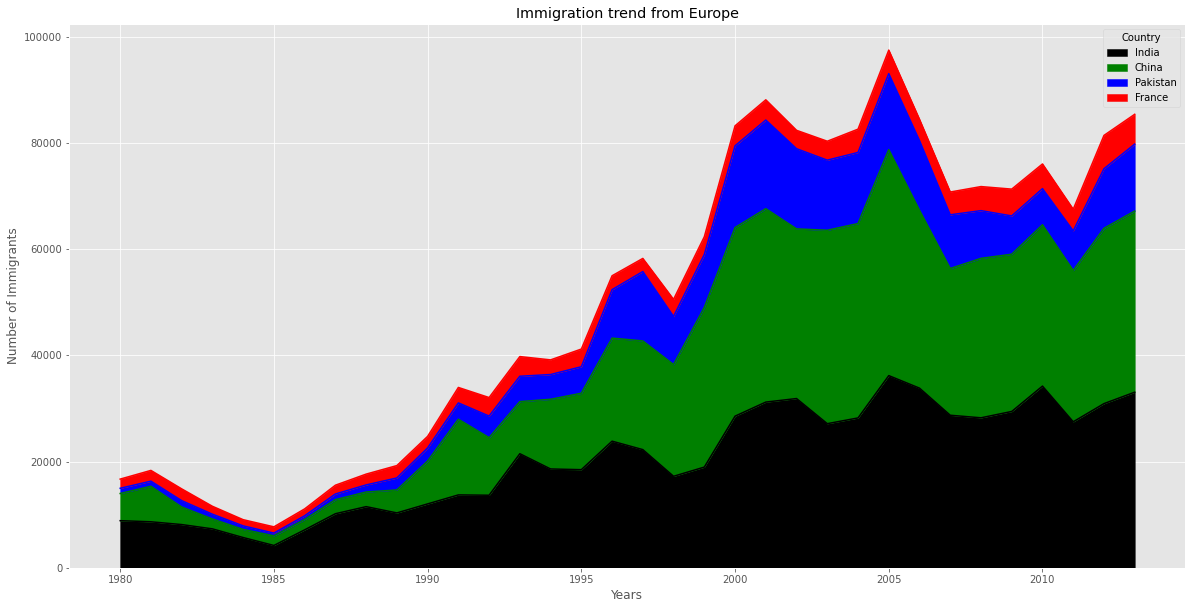

In [28]:
colors = ['black', 'green', 'blue', 'red']
top.plot(kind='area', stacked=True,
        figsize=(20, 10), color=colors)
plt.title('Immigration trend from Europe')
plt.ylabel('Number of Immigrants')
plt.xlabel('Years')
plt.show()

### Histogram

The histogram shows the distribution of a variable. Here is an example:



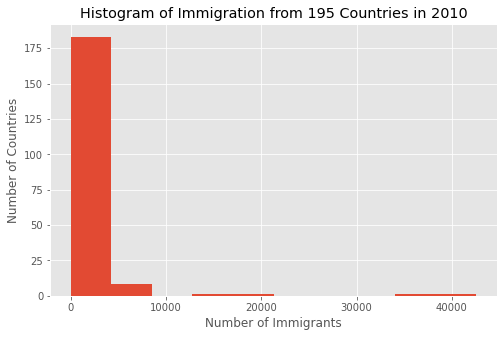

In [29]:
df[2005].plot(kind='hist', figsize=(8,5))
plt.title('Histogram of Immigration from 195 Countries in 2010') # add a title to the histogram
plt.ylabel('Number of Countries') # add y-label
plt.xlabel('Number of Immigrants') # add x-label
plt.show()

Let’s use the ‘top’ DataFrame from the scatter plot example and plot each country’s distribution of the number of immigrants in the same plot.

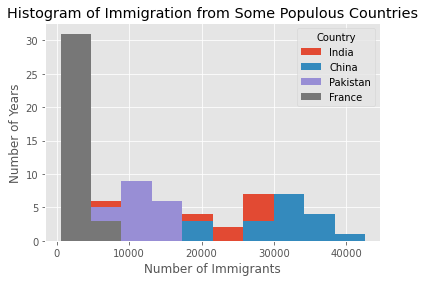

In [30]:
top.plot.hist()
plt.title('Histogram of Immigration from Some Populous Countries')
plt.ylabel('Number of Years')
plt.xlabel('Number of Immigrants')
plt.show()

In this plot, we do not see the bin edges clearly. Let’s improve this plot.

###### Specify the number of bins and find out the bin edges

I will use 15 bins. I am introducing a new parameter here called ‘alpha’. The alpha value determines the transparency of the colors. For these types of overlapping plots, transparency is important to see the shape of each distribution.

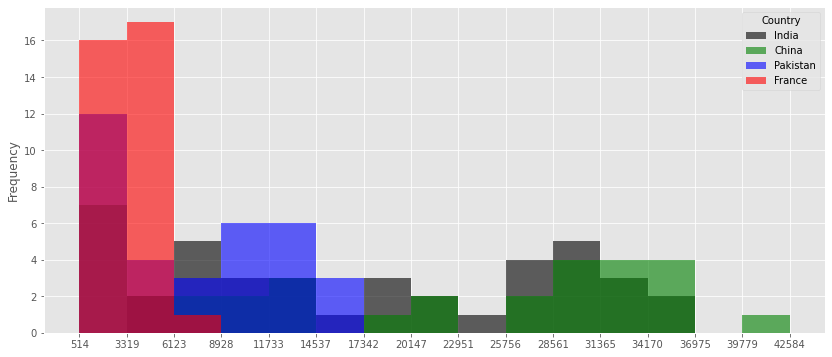

In [31]:
count, bin_edges = np.histogram(top, 15)
top.plot(kind = 'hist', figsize=(14, 6), bins=15, alpha=0.6, 
        xticks=bin_edges, color=colors);

Like the area plot, you can make a stacked plot of the histogram as well.

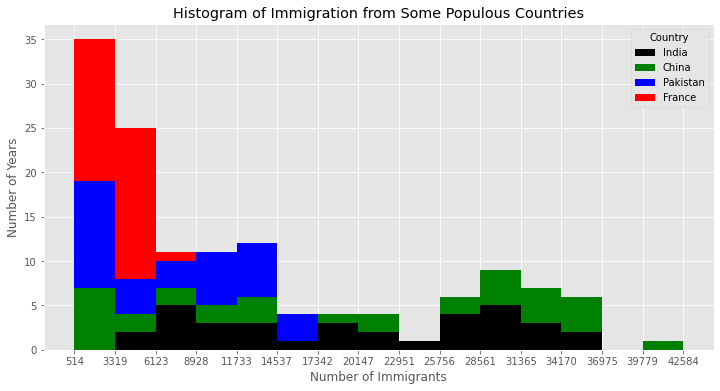

In [32]:
top.plot(kind='hist',
          figsize=(12, 6), 
          bins=15,
          xticks=bin_edges,
          color=colors,
          stacked=True,
         )
plt.title('Histogram of Immigration from Some Populous Countries')
plt.ylabel('Number of Years')
plt.xlabel('Number of Immigrants')
plt.show()

### Bar Plot

For the bar plot, I will use the number of immigrants from France per year.

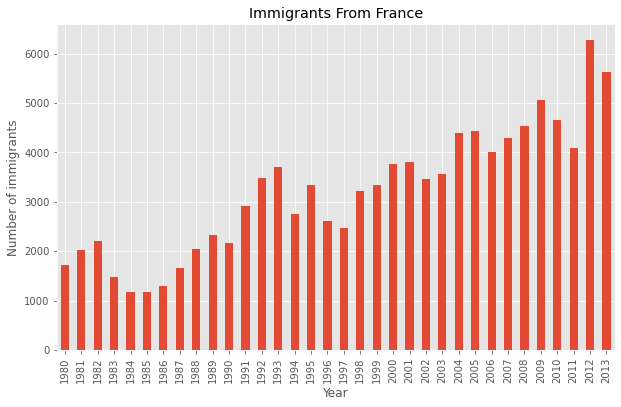

In [33]:
france = df.loc['France', years]
france.plot(kind='bar', figsize = (10, 6))
plt.xlabel('Year') 
plt.ylabel('Number of immigrants') 
plt.title('Immigrants From France')
plt.show()

You can add extra information to the bar plot. This plot shows an increasing trend since 1997 for over a decade. It could be worth mentioning. It can be done using an annotate function.

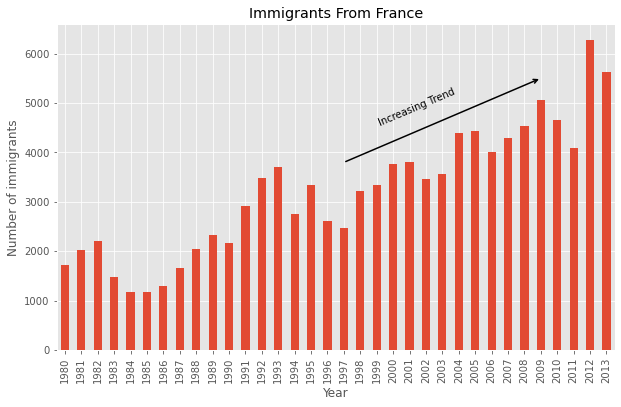

In [34]:
france.plot(kind='bar', figsize = (10, 6))
plt.xlabel('Year') 
plt.ylabel('Number of immigrants') 
plt.title('Immigrants From France')
plt.annotate('Increasing Trend',
            xy = (19, 4500),
            rotation= 23,
            va = 'bottom',
            ha = 'left')
plt.annotate('',
            xy=(29, 5500),
            xytext=(17, 3800),
            xycoords='data',
            arrowprops=dict(arrowstyle='->', connectionstyle='arc3', color='black', lw=1.5))
plt.show()

Sometimes, showing the bars horizontally makes it more understandable. Showing a label on the bars can be even better. Let’s do it.

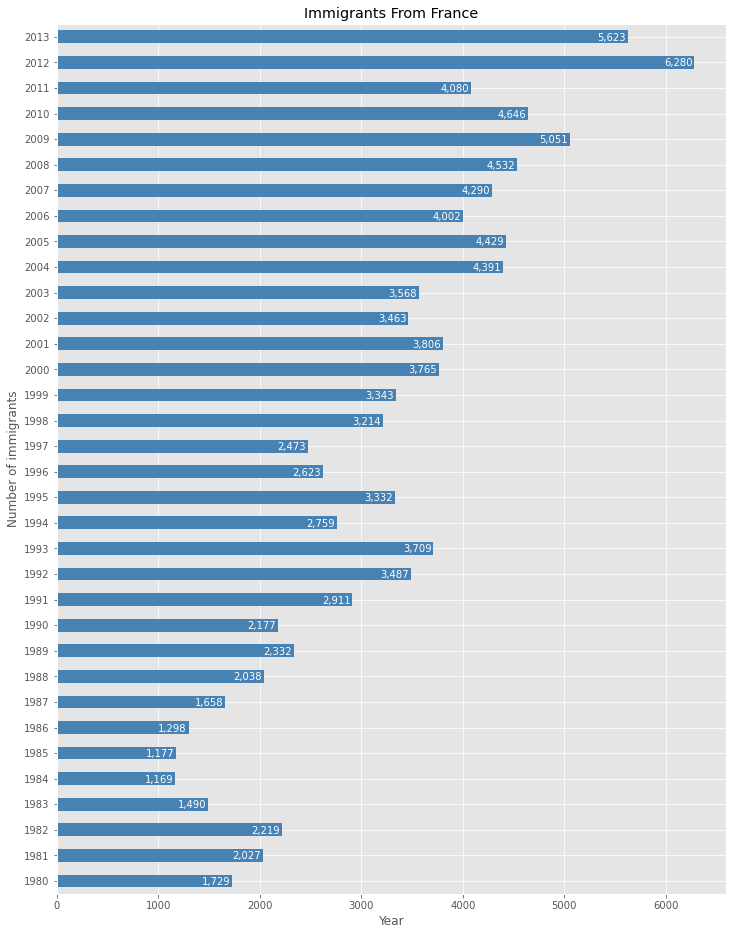

In [35]:
france.plot(kind='barh', figsize=(12, 16), color='steelblue')
plt.xlabel('Year') # add to x-label to the plot
plt.ylabel('Number of immigrants') # add y-label to the plot
plt.title('Immigrants From France') # add title to the plot
for index, value in enumerate(france):
    label = format(int(value), ',')
    plt.annotate(label, xy=(value-300, index-0.15), color='white')
    
plt.show()

# Advanced Matplotlib and Seaborn Plots

In [36]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

d = pd.read_csv("datasets/USA_cars_datasets.csv")
d.head()

,Unnamed: 0,price,brand,model,year,title_status,mileage,color,vin,lot,state,country,condition
0,0,6300,toyota,cruiser,2008,clean vehicle,274117,black,jtezu11f88k007763,159348797,new jersey,usa,10 days left
1,1,2899,ford,se,2011,clean vehicle,190552,silver,2fmdk3gc4bbb02217,166951262,tennessee,usa,6 days left
2,2,5350,dodge,mpv,2018,clean vehicle,39590,silver,3c4pdcgg5jt346413,167655728,georgia,usa,2 days left
3,3,25000,ford,door,2014,clean vehicle,64146,blue,1ftfw1et4efc23745,167753855,virginia,usa,22 hours left
4,4,27700,chevrolet,1500,2018,clean vehicle,6654,red,3gcpcrec2jg473991,167763266,florida,usa,22 hours left


### Diverging bars with texts

This plot will show the diverging bars and the value of each bar. We will plot the mean price for each brand. First, find the mean price for each brand using the pandas groupby function:

In [37]:
import numpy as np
d1 = d.groupby('brand')['price'].agg([np.mean])
d1.columns = ['mean_price']
d1.head()

,mean_price
brand,
acura,7266.666667
audi,13981.250000
bmw,26397.058824
buick,19715.769231
cadillac,24941.000000


The data frame d1 contains the mean price for each brand. It requires the normalized values for a diverging plot. We will normalize the mean price and put it in a new column named ‘price_z’ in the d1 data frame:

In [38]:
x = d1.loc[:, ['mean_price']]
d1['price_z'] = (x - x.mean()) / x.std()
d1.head()

,mean_price,price_z
brand,,
acura,7266.666667,-0.774626
audi,13981.250000,-0.204219
bmw,26397.058824,0.850508
buick,19715.769231,0.282930
cadillac,24941.000000,0.726815


In [39]:
d1.sort_values('price_z', axis=0, ascending=True, inplace=True)

To plot the text plot we need x and y values as usual. But also an extra parameter that is the text that is to be plotted.

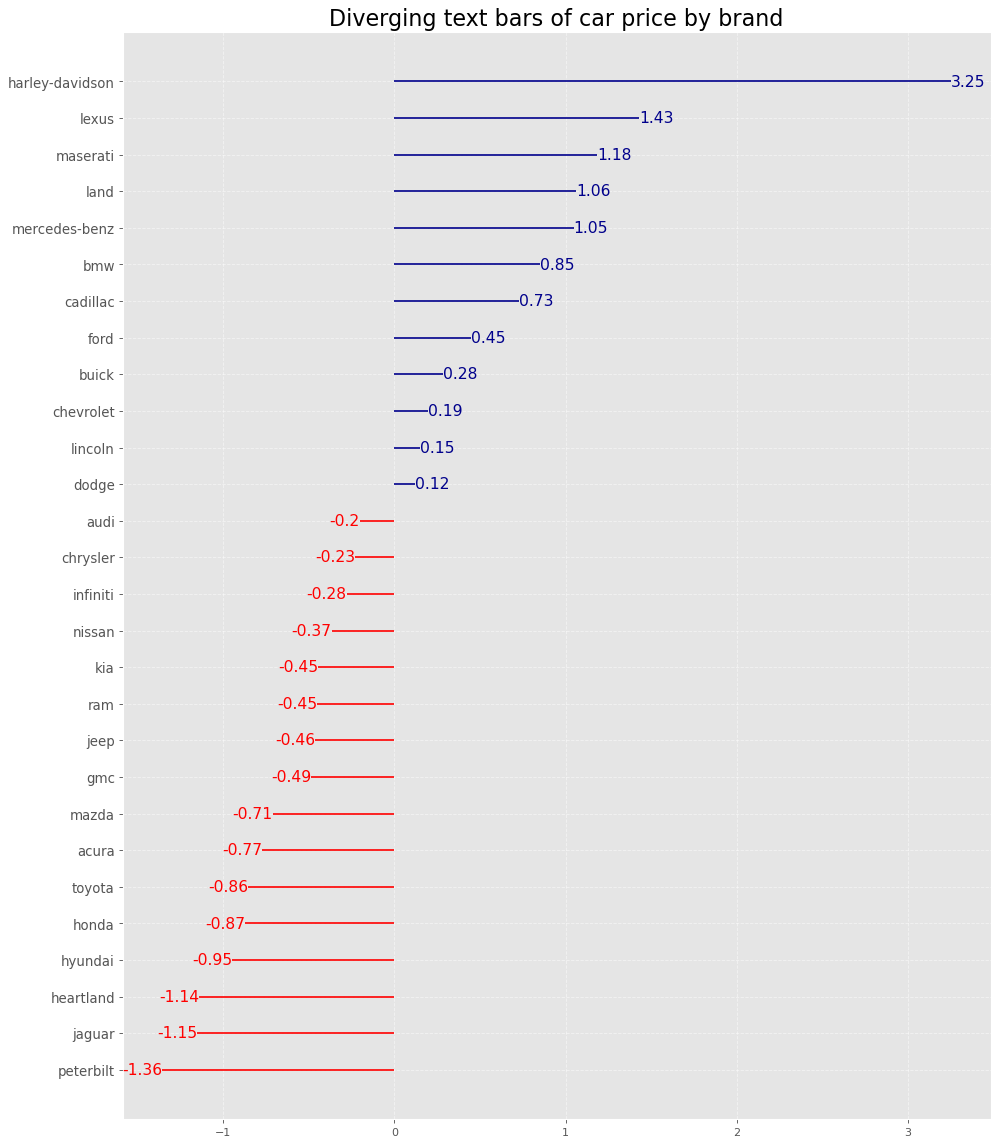

In [40]:
plt.figure(figsize=(14, 18), dpi=80)

for x, y, tex in zip(d1.price_z, d1.index, d1.price_z):
    t = plt.text(x, y, round(tex, 2), 
                 horizontalalignment='right' if x < 0 else 'left', 
                 verticalalignment='center', 
                 fontdict={'color': 'red' if x < 0 else 'darkblue', 'size': 14})

    plt.hlines(y, xmin=0, xmax=tex, color='red' if tex < 0 else 'darkblue')
    
plt.yticks(d1.index, fontsize=12)
plt.title("Diverging text bars of car price by brand", fontdict={"size": 20})
plt.grid(linestyle = '--', alpha=0.5)
plt.show()

### Improved Bar Plot

<ipython-input-41-08180cf6cfdd>:10: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_xticklabels(d2.index, fontdict={'size': 12}, rotation=60)


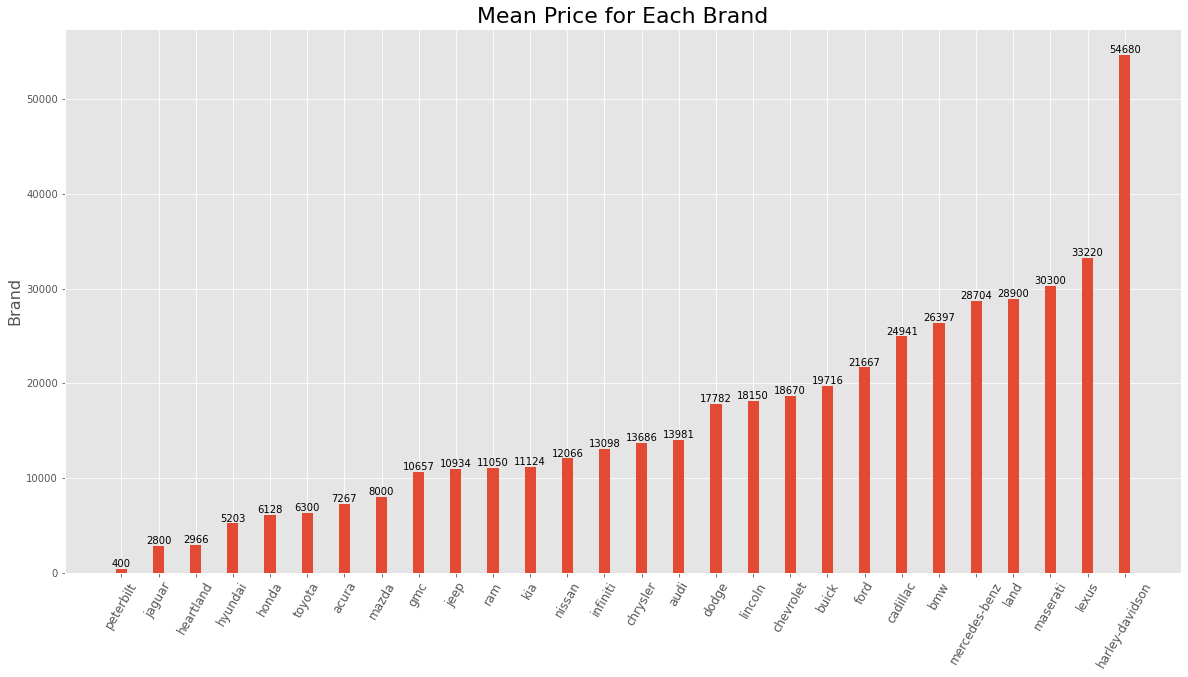

In [41]:
d2 = d1.copy()

plt.figure(figsize=(20, 10))

plt.bar(d2.index, d2['mean_price'], width=0.3)
for i, val in enumerate(d2['mean_price'].values):
    plt.text(i, val, round(float(val)), horizontalalignment='center', 
             verticalalignment='bottom', fontdict={'fontweight':500, 'size': 10})
    
plt.gca().set_xticklabels(d2.index, fontdict={'size': 12}, rotation=60)
plt.title("Mean Price for Each Brand", fontsize=22)
plt.ylabel("Brand", fontsize=16)
plt.show()

Another Method:

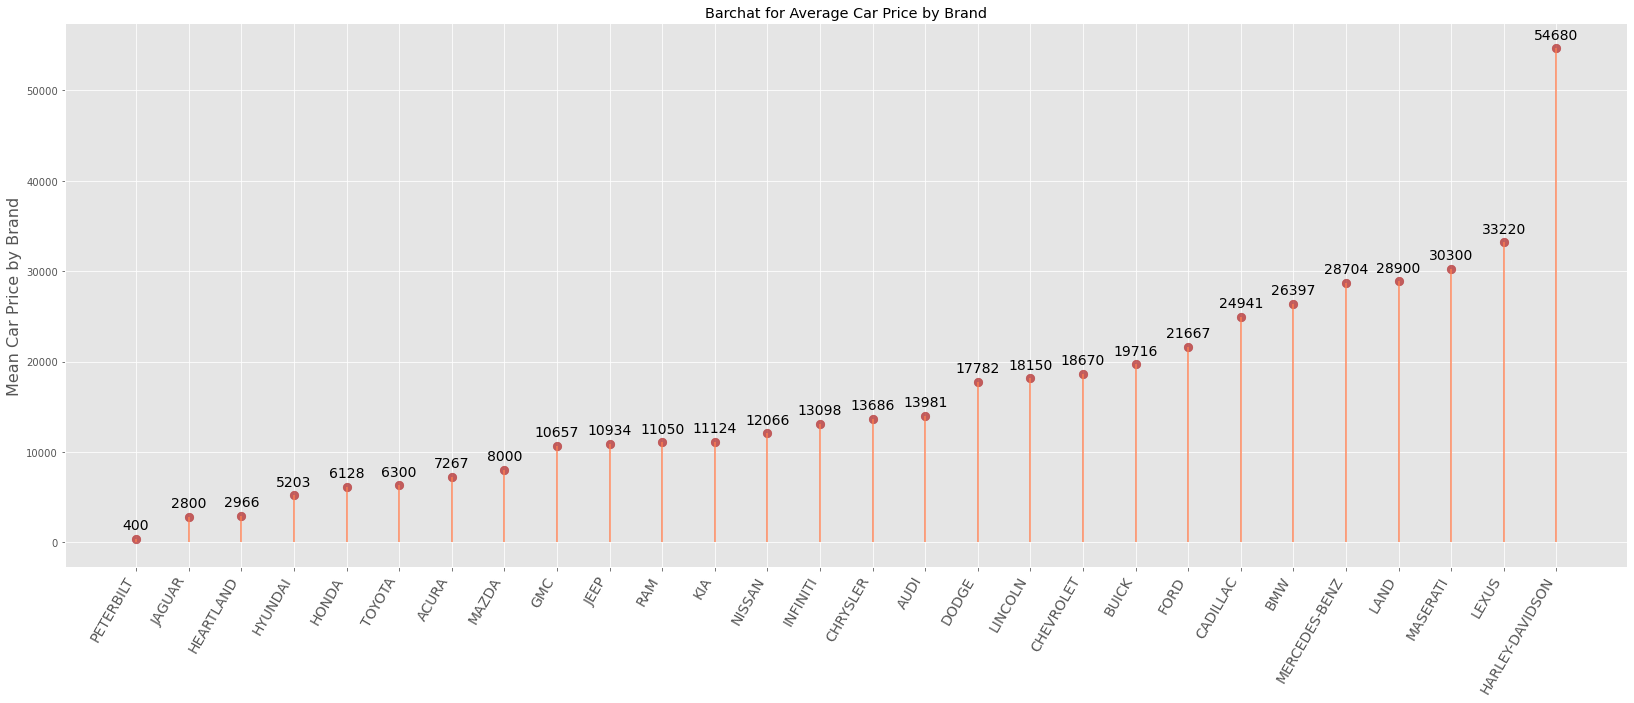

In [42]:
fig, ax = plt.subplots(figsize=(28, 10))
ax.vlines(x=d1.index, ymin=0, ymax=d1.mean_price, color= 'coral', alpha=0.7, linewidth=2)
ax.scatter(x=d1.index, y=d1.mean_price, s = 75, color='firebrick', alpha = 0.7 )

ax.set_title("Barchat for Average Car Price by Brand")

ax.set_ylabel("Mean Car Price by Brand", fontsize=16)
ax.set_xticks(d1.index)
ax.set_xticklabels(d1.index.str.upper(), rotation=60, fontdict={'horizontalalignment': 'right', 'size':14})

for row in d1.itertuples():
    ax.text(row.Index, row.mean_price+700, s=round(row.mean_price), horizontalalignment = 'center', verticalalignment='bottom', fontsize=14)
plt.show()

###### Dealing with a big dataset

In [43]:
d = pd.read_csv('datasets/nhanes_2015_2016.csv')

In [44]:
d.columns

Index(['SEQN', 'ALQ101', 'ALQ110', 'ALQ130', 'SMQ020', 'RIAGENDR', 'RIDAGEYR',
       'RIDRETH1', 'DMDCITZN', 'DMDEDUC2', 'DMDMARTL', 'DMDHHSIZ', 'WTINT2YR',
       'SDMVPSU', 'SDMVSTRA', 'INDFMPIR', 'BPXSY1', 'BPXDI1', 'BPXSY2',
       'BPXDI2', 'BMXWT', 'BMXHT', 'BMXBMI', 'BMXLEG', 'BMXARML', 'BMXARMC',
       'BMXWAIST', 'HIQ210'],
      dtype='object')

The column ‘DMDEDUC2’ shows the education level of the population and ‘RIDRETH1’ shows the ethnic origin of the population. Both are categorical variables. The next plot will plot the number of each ethnic origin for each education level.

C:\Users\Asus\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


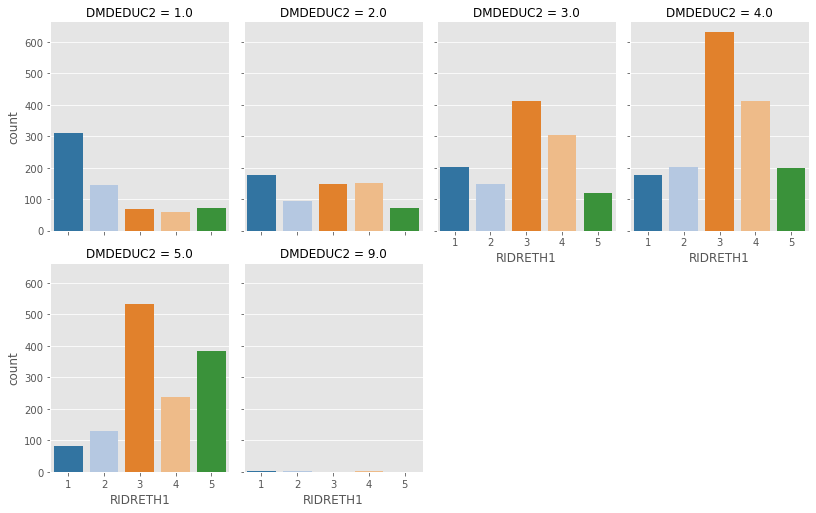

In [45]:
sns.catplot("RIDRETH1", col= "DMDEDUC2", col_wrap = 4,
               data=d[d.DMDEDUC2.notnull()],
               kind="count", height=3.5, aspect=.8,
               palette='tab20')
plt.show()

###### What if both the variable is not categorical?

In that case, a segregated violin plot will be more appropriate. We will show how to use violin plots for different numbers of variables. First, let’s plot the distribution of age for each education level.

C:\Users\Asus\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


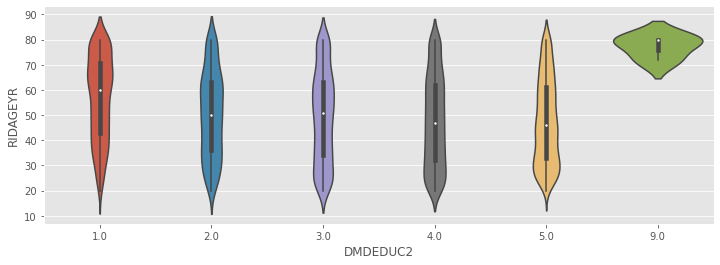

In [46]:
plt.figure(figsize=(12, 4))
a = sns.violinplot(d.DMDEDUC2, d.RIDAGEYR)

It shows the distribution of age for each education level. For example, in education level 1, we find more people above 60. In education level 5, you will find more people around 30.

It will be even more efficient to see the distribution of age of males and females separately.

C:\Users\Asus\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


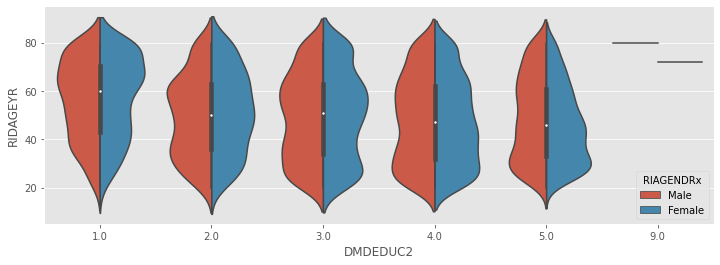

In [47]:
d['RIAGENDRx'] = d.RIAGENDR.replace({1: "Male", 2: "Female"})

plt.figure(figsize=(12, 4))
a = sns.violinplot(d.DMDEDUC2, d.RIDAGEYR, hue=d.RIAGENDRx, split=True)

You have the distribution of age for males and females of each education level.

Let’s add one more variable to it. What if I want the same information as the previous plot for each ethnic group.

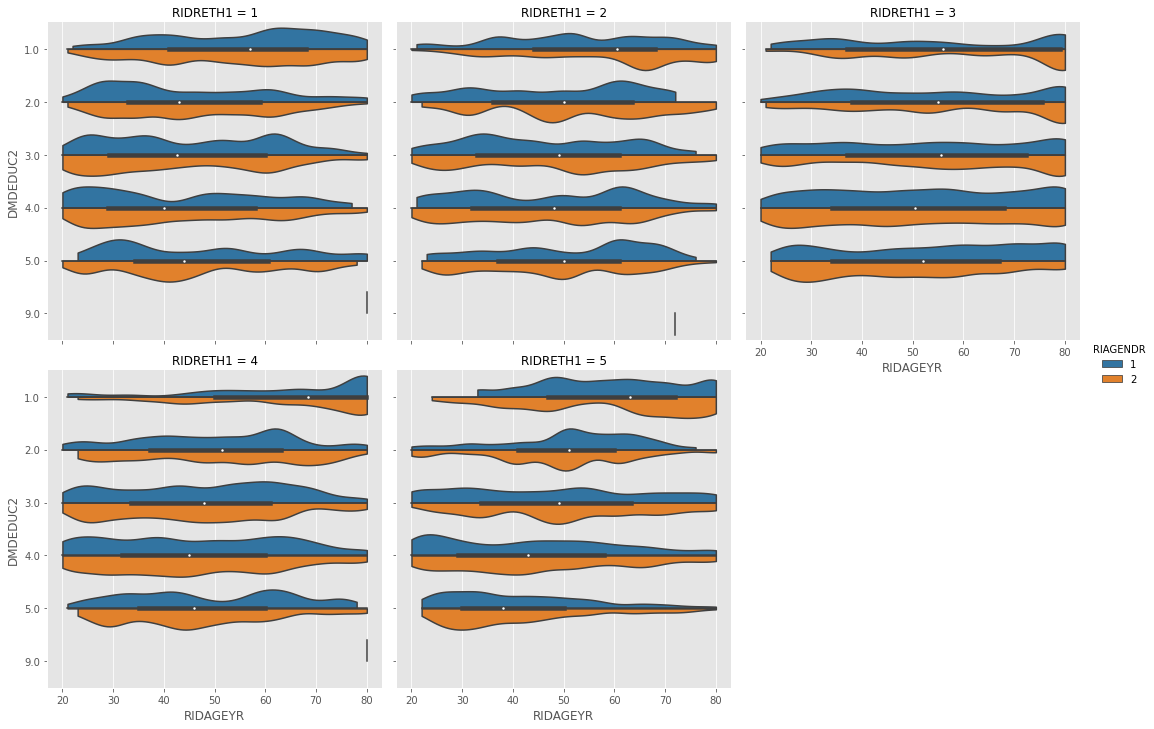

In [48]:
sns.catplot(x='RIDAGEYR', y="DMDEDUC2", hue='RIAGENDR', col="RIDRETH1",split=True,
           data = d[d.DMDEDUC2.notnull()], col_wrap=3,
           orient="h", height=5, aspect=1, palette='tab10', 
           kind='violin', didge=True, cut=0, bw=.2);